# Decison Tree

Objective: Predicting types of drugs given on certain attributes  
Dataset: drug200.csv  
Ref: NA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("drug200.csv", delimiter=",")
print('Dataset size', data.shape)
data.head()

Dataset size (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Data Exploration 

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64


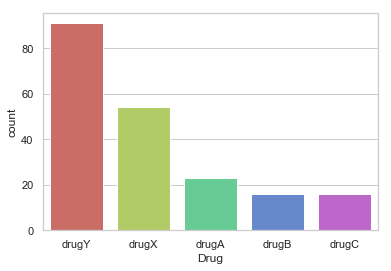

In [2]:
print(data['Drug'].value_counts())

sns.countplot(x='Drug',data = data, palette='hls',order = data['Drug'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

M    104
F     96
Name: Sex, dtype: int64


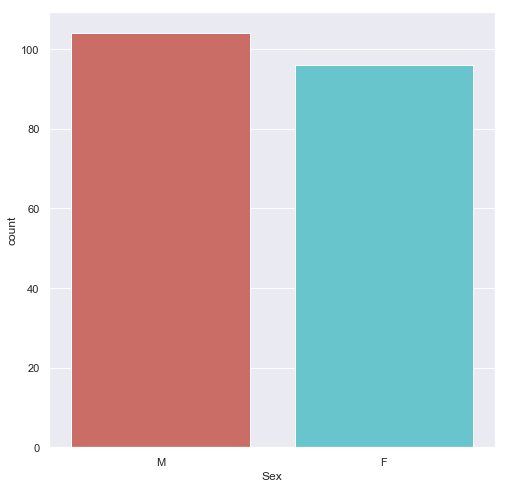

In [3]:
print(data['Sex'].value_counts())

sns.countplot(x='Sex',data = data, palette='hls',order = data['Sex'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


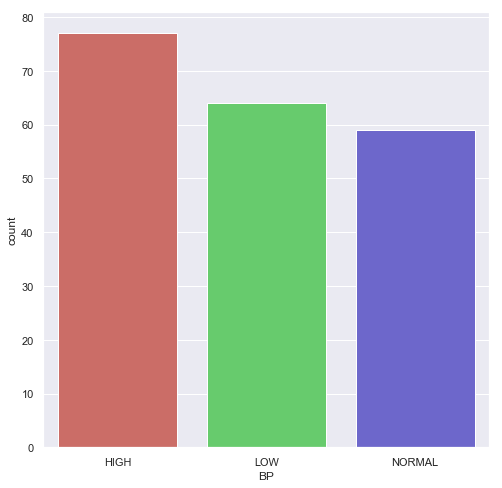

In [4]:
print(data['BP'].value_counts())

sns.countplot(x='BP',data = data, palette='hls',order = data['BP'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


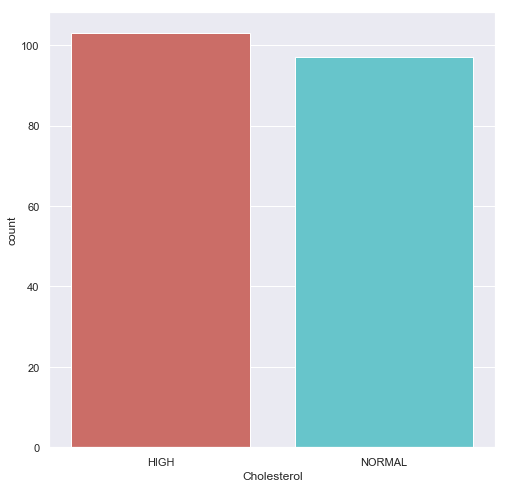

In [5]:
print(data['Cholesterol'].value_counts())

sns.countplot(x='Cholesterol',data = data, palette='hls',order = data['Cholesterol'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [6]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
data["Sex"] = data["Sex"].astype('category')
data["Sex_cat"] = data["Sex"].cat.codes      # F=0, M=1

data["BP"] = data["BP"].astype('category')
data["BP_cat"] = data["BP"].cat.codes        # HIGH=0, LOW=1, NORMAL=2

data["Cholesterol"] = data["Cholesterol"].astype('category')
data["Cholesterol_cat"] = data["Cholesterol"].cat.codes    # HIGH=0, NORMAL=1

data["Drug"] = data["Drug"].astype('category')
data["Drug_cat"] = data["Drug"].cat.codes     #drugY=4, drugC=2, drugX=3, drugA=0, drugB=1

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cat,BP_cat,Cholesterol_cat,Drug_cat
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4


## Correlation

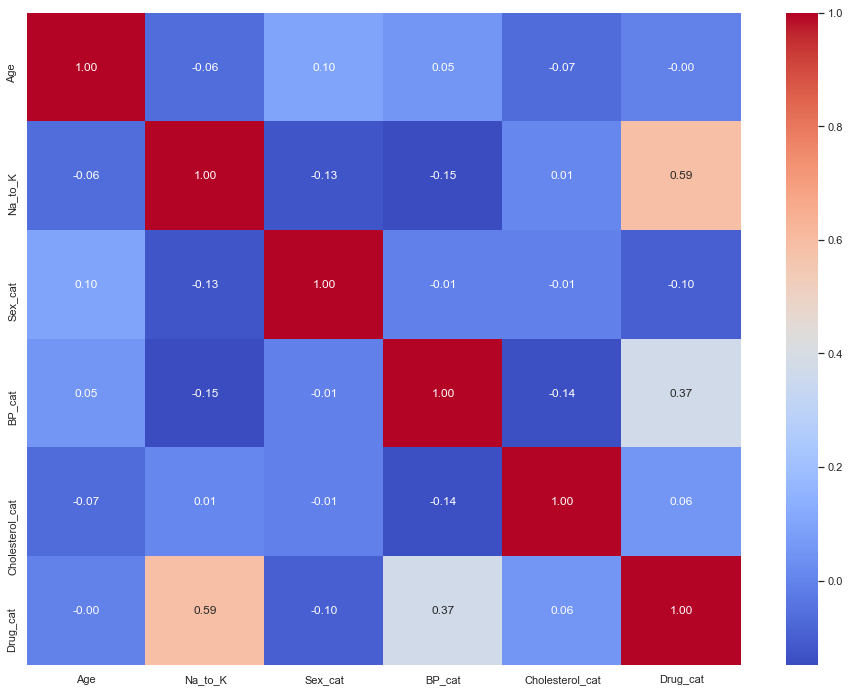

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [9]:
corr_rank = data.corr()
corr_rank["Drug_cat"].sort_values(ascending=False)

Drug_cat           1.000000
Na_to_K            0.589120
BP_cat             0.372868
Cholesterol_cat    0.055629
Age               -0.004828
Sex_cat           -0.098573
Name: Drug_cat, dtype: float64

## Data Processing and Selection

In [10]:
#split dataset - feature
X = data[['Na_to_K','BP_cat','Cholesterol_cat','Age','Sex_cat']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (200, 5)


array([[25.355,  0.   ,  0.   , 23.   ,  0.   ],
       [13.093,  1.   ,  0.   , 47.   ,  1.   ]])

In [11]:
#drugY=4, drugC=2, drugX=3, drugA=0, drugB=1
y = data["Drug_cat"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (200,)


0    4
1    2
2    2
3    3
4    4
Name: Drug_cat, dtype: int8

## Split Train Test

In [12]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size=0.3,random_state=3)

print("X TRAIN Set: ", X_trainset.shape, y_trainset.shape)
print("X TEST Set : ", X_testset.shape, y_testset.shape)

X TRAIN Set:  (140, 5) (140,)
X TEST Set :  (60, 5) (60,)


## Entropy Criterion

In [13]:
#specify criterion='entropy' see information gain of each node
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#fit with data
DTree.fit(X_trainset, y_trainset)

#making prediction and store in predTree
predTree = DTree.predict(X_testset)
print(predTree.shape)
predTree

(60,)


array([4, 3, 3, 3, 3, 2, 4, 0, 1, 0, 4, 0, 4, 4, 3, 4, 3, 3, 1, 3, 3, 4,
       4, 4, 3, 1, 4, 4, 0, 3, 1, 2, 2, 3, 3, 2, 4, 3, 3, 3, 0, 4, 2, 4,
       0, 4, 4, 4, 4, 4, 1, 3, 4, 3, 4, 4, 0, 3, 4, 3], dtype=int8)

In [14]:
#calculate model accuracy
from sklearn import metrics
print("Decision Tree's Accuracy: ", round(metrics.accuracy_score(y_testset, predTree),5))
print("Accuracy score 2        : ", round(DTree.score(X_testset, y_testset),5))

Decision Tree's Accuracy:  0.98333
Accuracy score 2        :  0.98333


## Gini Criterion

In [15]:
DTgini = DecisionTreeClassifier(criterion="gini", max_depth = 4)

#fit with data
DTgini.fit(X_trainset, y_trainset)

#making prediction and store in predTree
predTreeGini = DTgini.predict(X_testset)
print(predTree.shape)
predTreeGini

(60,)


array([4, 3, 3, 3, 3, 2, 4, 0, 1, 0, 4, 0, 4, 4, 3, 4, 3, 3, 1, 3, 3, 4,
       4, 4, 3, 1, 4, 4, 0, 3, 1, 2, 2, 3, 3, 2, 4, 3, 3, 3, 0, 4, 2, 4,
       0, 4, 4, 4, 4, 4, 1, 3, 4, 3, 4, 4, 0, 3, 4, 3], dtype=int8)

In [16]:
#calculate model accuracy
from sklearn import metrics
print("Decision Tree's Accuracy: ", round(metrics.accuracy_score(y_testset, predTreeGini),5))
print("Accuracy score 2        : ", round(DTgini.score(X_testset, y_testset),5))

Decision Tree's Accuracy:  0.98333
Accuracy score 2        :  0.98333
